In [0]:
!pip install albumentations==0.4.5

In [0]:
import data_loader_alb
from resnet import ResNet18
from utils import model_summary, plot_logs, best_lr, plot_misclassified, to_tensor

In [0]:
from train import train_model
from gradcam import GradDisplay
from lr_finder import LRFinder

In [0]:
from torch import nn
import torch.optim as optim
import torch

In [34]:
trainloader, testloader, classes = data_loader_alb.cifar10()
net = ResNet18()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


In [35]:
device = model_summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
#saving the initial weights to run multiple lr finding iterations
torch.save(model.state_dict(), 'weights_only.pth')


Learning rate search finished. See the graph with {finder_name}.plot()


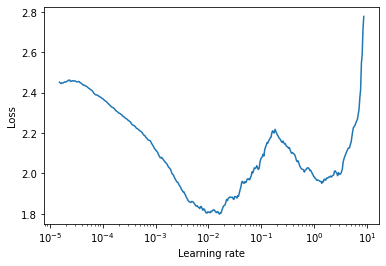


Learning rate search finished. See the graph with {finder_name}.plot()


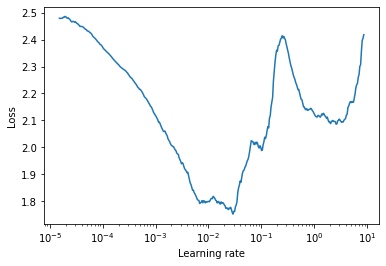


Learning rate search finished. See the graph with {finder_name}.plot()


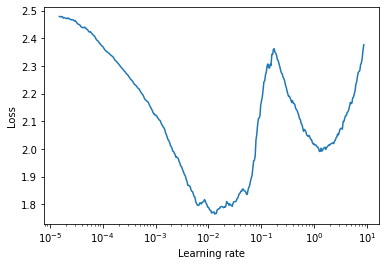


Learning rate search finished. See the graph with {finder_name}.plot()


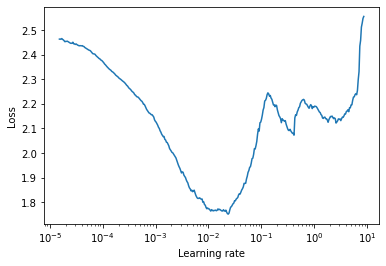


Learning rate search finished. See the graph with {finder_name}.plot()


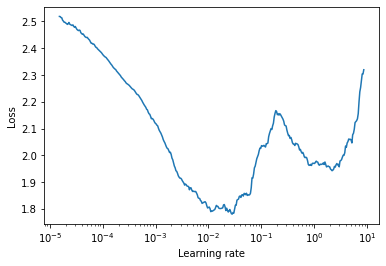


Learning rate search finished. See the graph with {finder_name}.plot()


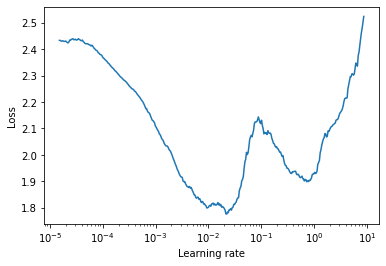


Learning rate search finished. See the graph with {finder_name}.plot()


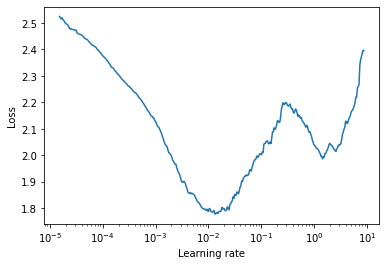


Learning rate search finished. See the graph with {finder_name}.plot()


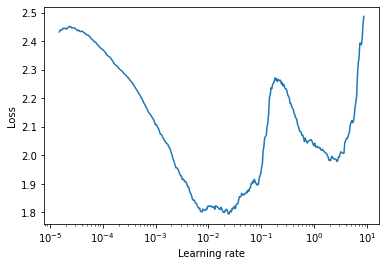


Learning rate search finished. See the graph with {finder_name}.plot()


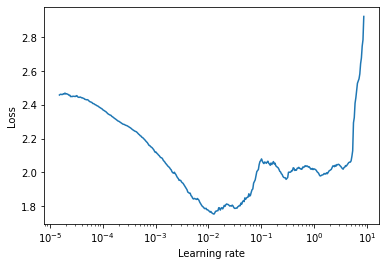


Learning rate search finished. See the graph with {finder_name}.plot()


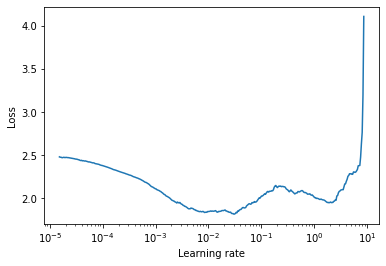

In [0]:
lrs=[]
for i in range(10):
  model.load_state_dict(torch.load('weights_only.pth'))#loading the same weights for every iteration
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)
  lr_finder = LRFinder(model, optimizer, criterion, device=device)
  lr_finder.range_test(trainloader, end_lr=10, num_iter=400)
  lr_finder.plot() # to inspect the loss-learning rate graph
  lr_finder.reset()
  lrs.append(best_lr(lr_finder))

In [0]:
#taking the mean of all the lrs
best_lr = sum(lrs)/10
print(best_lr)

0.021373092050140877

In [0]:
best_lr = 0.021373092050140877

In [46]:
#loading the same initial weights for which, we found the best lr
net.load_state_dict(torch.load('weights_only.pth'))

<All keys matched successfully>

In [47]:
trainer = train_model(trainloader, testloader, device)
logs, misclassified_images = trainer.run_model(net, lr = best_lr, epochs=50, patience=5, sch=True)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4556955099105835 Batch_id=390 Accuracy=43.31: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1443, Accuracy: 5909/10000 (59.09%)

EPOCH: 2


Loss=0.7971884608268738 Batch_id=390 Accuracy=62.38: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8795, Accuracy: 7001/10000 (70.01%)

EPOCH: 3


Loss=0.723305344581604 Batch_id=390 Accuracy=70.72: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8216, Accuracy: 7240/10000 (72.40%)

EPOCH: 4


Loss=0.6854634881019592 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6287, Accuracy: 7862/10000 (78.62%)

EPOCH: 5


Loss=0.696404218673706 Batch_id=390 Accuracy=78.40: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6848, Accuracy: 7792/10000 (77.92%)

EPOCH: 6


Loss=0.6141113042831421 Batch_id=390 Accuracy=80.88: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5683, Accuracy: 8097/10000 (80.97%)

EPOCH: 7


Loss=0.44890379905700684 Batch_id=390 Accuracy=82.64: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5055, Accuracy: 8298/10000 (82.98%)

EPOCH: 8


Loss=0.3671088218688965 Batch_id=390 Accuracy=83.97: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4953, Accuracy: 8325/10000 (83.25%)

EPOCH: 9


Loss=0.35805386304855347 Batch_id=390 Accuracy=85.66: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5220, Accuracy: 8358/10000 (83.58%)

EPOCH: 10


Loss=0.4863980710506439 Batch_id=390 Accuracy=86.49: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7700, Accuracy: 7737/10000 (77.37%)

EPOCH: 11


Loss=0.3063156008720398 Batch_id=390 Accuracy=87.63: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4671, Accuracy: 8533/10000 (85.33%)

EPOCH: 12


Loss=0.2650802433490753 Batch_id=390 Accuracy=88.45: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4352, Accuracy: 8593/10000 (85.93%)

EPOCH: 13


Loss=0.23140139877796173 Batch_id=390 Accuracy=89.32: 100%|██████████| 391/391 [03:29<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4489, Accuracy: 8636/10000 (86.36%)

EPOCH: 14


Loss=0.2022666037082672 Batch_id=390 Accuracy=90.04: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4472, Accuracy: 8675/10000 (86.75%)

EPOCH: 15


Loss=0.20916810631752014 Batch_id=390 Accuracy=90.98: 100%|██████████| 391/391 [03:29<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4504, Accuracy: 8675/10000 (86.75%)

EPOCH: 16


Loss=0.1935596466064453 Batch_id=390 Accuracy=91.44: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4718, Accuracy: 8658/10000 (86.58%)

EPOCH: 17


Loss=0.1921621412038803 Batch_id=390 Accuracy=92.20: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5058, Accuracy: 8595/10000 (85.95%)

EPOCH: 18


Loss=0.31798499822616577 Batch_id=390 Accuracy=92.62: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4320, Accuracy: 8717/10000 (87.17%)

EPOCH: 19


Loss=0.18927431106567383 Batch_id=390 Accuracy=93.11: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5001, Accuracy: 8691/10000 (86.91%)

EPOCH: 20


Loss=0.16656675934791565 Batch_id=390 Accuracy=93.34: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4782, Accuracy: 8685/10000 (86.85%)

EPOCH: 21


Loss=0.09235761314630508 Batch_id=390 Accuracy=93.81: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4912, Accuracy: 8674/10000 (86.74%)

EPOCH: 22


Loss=0.12721213698387146 Batch_id=390 Accuracy=94.26: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5018, Accuracy: 8723/10000 (87.23%)

EPOCH: 23


Loss=0.13976158201694489 Batch_id=390 Accuracy=94.31: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4330, Accuracy: 8837/10000 (88.37%)

EPOCH: 24


Loss=0.09504035860300064 Batch_id=390 Accuracy=94.80: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5129, Accuracy: 8702/10000 (87.02%)

EPOCH: 25


Loss=0.025634098798036575 Batch_id=390 Accuracy=96.59: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3774, Accuracy: 8991/10000 (89.91%)

EPOCH: 26


Loss=0.12100483477115631 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3795, Accuracy: 8995/10000 (89.95%)

EPOCH: 27


Loss=0.08776942640542984 Batch_id=390 Accuracy=97.51: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3800, Accuracy: 9011/10000 (90.11%)

EPOCH: 28


Loss=0.04233511909842491 Batch_id=390 Accuracy=97.65: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3848, Accuracy: 9001/10000 (90.01%)

EPOCH: 29


Loss=0.05481157451868057 Batch_id=390 Accuracy=97.61: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3847, Accuracy: 8993/10000 (89.93%)

EPOCH: 30


Loss=0.09700120985507965 Batch_id=390 Accuracy=97.91: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3858, Accuracy: 9012/10000 (90.12%)

EPOCH: 31


Loss=0.04956168681383133 Batch_id=390 Accuracy=97.79: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3840, Accuracy: 9022/10000 (90.22%)

EPOCH: 32


Loss=0.11382903903722763 Batch_id=390 Accuracy=98.14: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3811, Accuracy: 9020/10000 (90.20%)

EPOCH: 33


Loss=0.024212300777435303 Batch_id=390 Accuracy=98.09: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3802, Accuracy: 9012/10000 (90.12%)

EPOCH: 34


Loss=0.012031597085297108 Batch_id=390 Accuracy=98.24: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3865, Accuracy: 9020/10000 (90.20%)

EPOCH: 35


Loss=0.04785511642694473 Batch_id=390 Accuracy=98.16: 100%|██████████| 391/391 [03:30<00:00,  1.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3843, Accuracy: 9015/10000 (90.15%)

EPOCH: 36


Loss=0.12696364521980286 Batch_id=390 Accuracy=98.18: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3854, Accuracy: 9028/10000 (90.28%)

EPOCH: 37


Loss=0.09493148326873779 Batch_id=390 Accuracy=98.06: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3798, Accuracy: 9030/10000 (90.30%)

EPOCH: 38


Loss=0.02267283760011196 Batch_id=390 Accuracy=98.27: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3802, Accuracy: 9034/10000 (90.34%)

EPOCH: 39


Loss=0.15204648673534393 Batch_id=390 Accuracy=98.05: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3833, Accuracy: 9025/10000 (90.25%)

EPOCH: 40


Loss=0.03604460135102272 Batch_id=390 Accuracy=98.20: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3855, Accuracy: 9030/10000 (90.30%)

EPOCH: 41


Loss=0.03278745338320732 Batch_id=390 Accuracy=98.21: 100%|██████████| 391/391 [03:29<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3827, Accuracy: 9031/10000 (90.31%)

EPOCH: 42


Loss=0.0949217900633812 Batch_id=390 Accuracy=98.24: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3843, Accuracy: 9024/10000 (90.24%)

EPOCH: 43


Loss=0.04103482887148857 Batch_id=390 Accuracy=98.25: 100%|██████████| 391/391 [03:28<00:00,  1.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3844, Accuracy: 9026/10000 (90.26%)

EPOCH: 44


Loss=0.07168221473693848 Batch_id=390 Accuracy=98.28: 100%|██████████| 391/391 [03:25<00:00,  1.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3842, Accuracy: 9027/10000 (90.27%)

EPOCH: 45


Loss=0.026660989969968796 Batch_id=390 Accuracy=98.16: 100%|██████████| 391/391 [03:27<00:00,  1.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3842, Accuracy: 9033/10000 (90.33%)

EPOCH: 46


Loss=0.021077830344438553 Batch_id=390 Accuracy=98.13: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3828, Accuracy: 9023/10000 (90.23%)

EPOCH: 47


Loss=0.086620032787323 Batch_id=390 Accuracy=98.16: 100%|██████████| 391/391 [03:26<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3821, Accuracy: 9030/10000 (90.30%)

EPOCH: 48


Loss=0.0104552386328578 Batch_id=390 Accuracy=98.11: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3815, Accuracy: 9028/10000 (90.28%)

EPOCH: 49


Loss=0.12622572481632233 Batch_id=390 Accuracy=98.25: 100%|██████████| 391/391 [03:27<00:00,  1.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3840, Accuracy: 9035/10000 (90.35%)

EPOCH: 50


Loss=0.08416981250047684 Batch_id=390 Accuracy=98.26: 100%|██████████| 391/391 [03:24<00:00,  1.91it/s]



Test set: Average loss: 0.3851, Accuracy: 9025/10000 (90.25%)



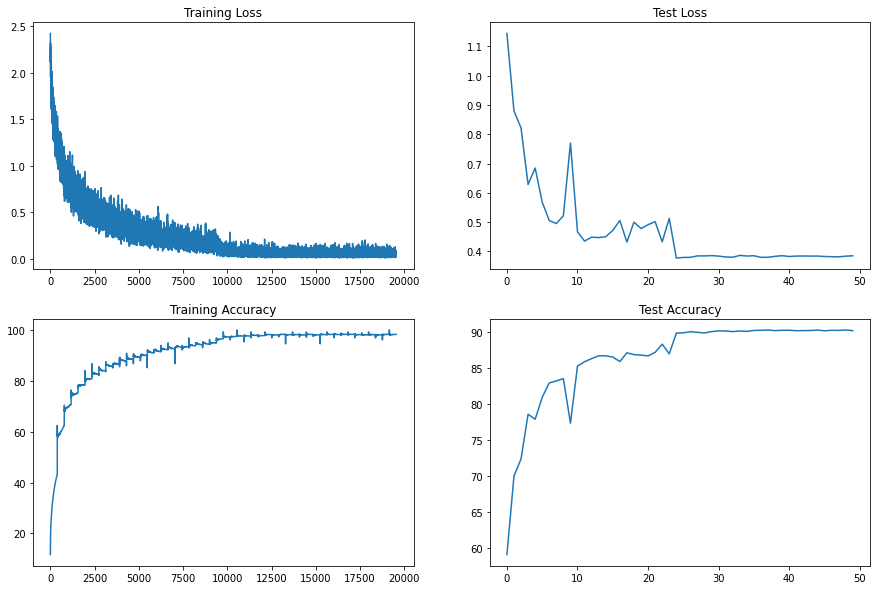

In [48]:
plot_logs(logs)

In [0]:
mean=tuple([0.4914, 0.48216, 0.44653])
std=tuple([0.24703, 0.24349, 0.26159])

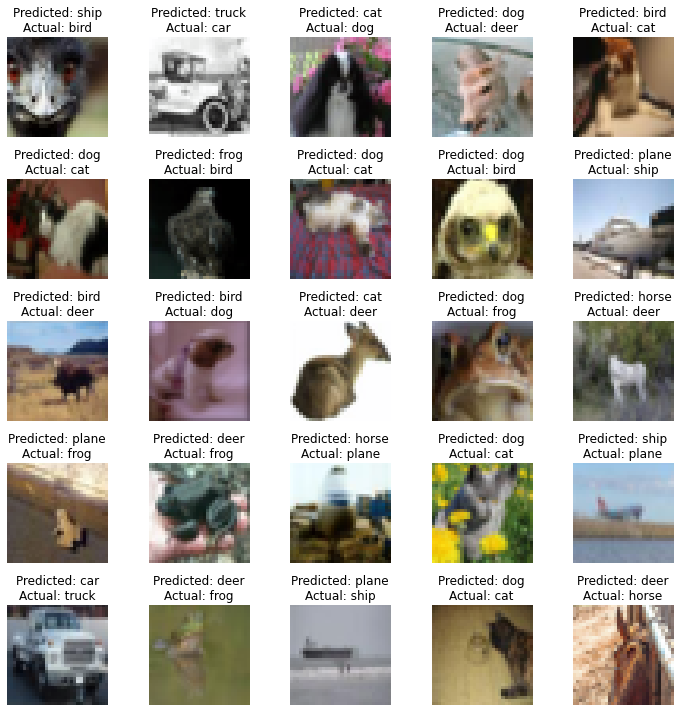

In [50]:
#plotting misclassified images
plot_misclassified("misclassified", mean, std, misclassified_images, classes)

In [0]:
#extracting images from misclassified_images, which also contains labels
images = []
pred = []
targ = []
num_of_images = len(misclassified_images)
for index in range(num_of_images):
    img = to_tensor(misclassified_images[index - 1]["img"])
    images.append(img)
    pred.append(classes[misclassified_images[index - 1]["pred"]])
    targ.append(classes[misclassified_images[index - 1]["target"]])

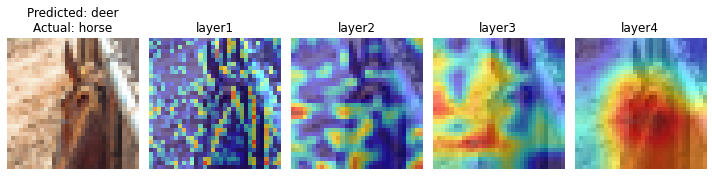

<Figure size 432x288 with 0 Axes>

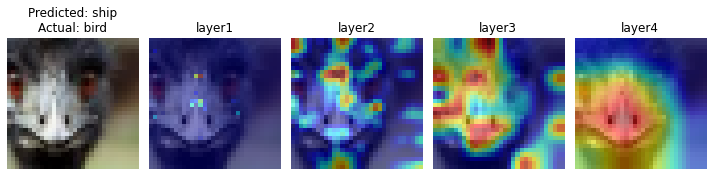

<Figure size 432x288 with 0 Axes>

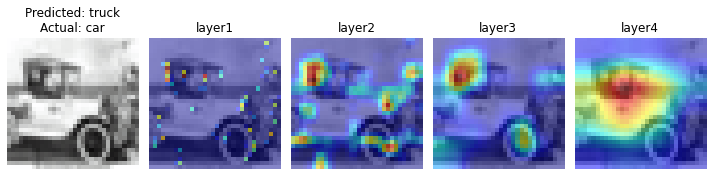

<Figure size 432x288 with 0 Axes>

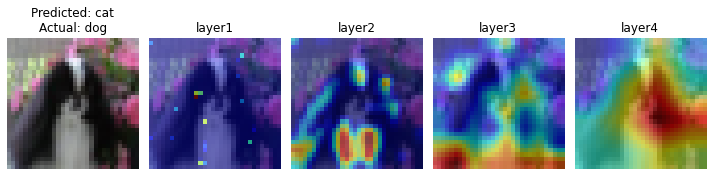

<Figure size 432x288 with 0 Axes>

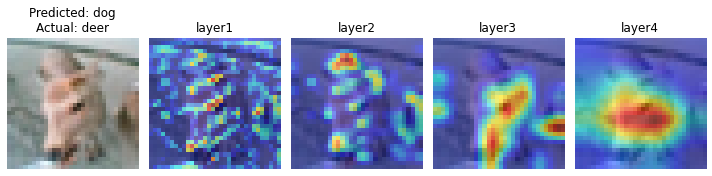

<Figure size 432x288 with 0 Axes>

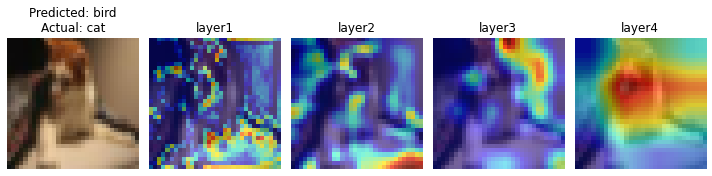

<Figure size 432x288 with 0 Axes>

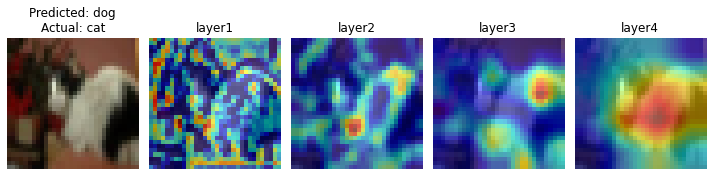

<Figure size 432x288 with 0 Axes>

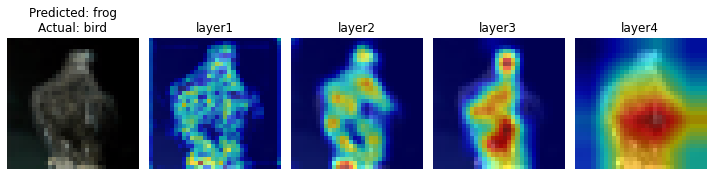

<Figure size 432x288 with 0 Axes>

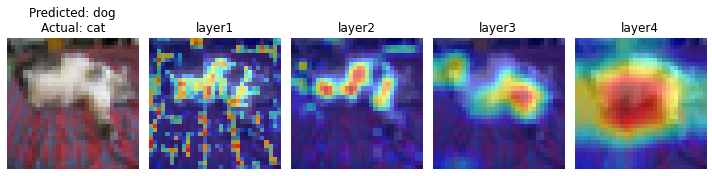

<Figure size 432x288 with 0 Axes>

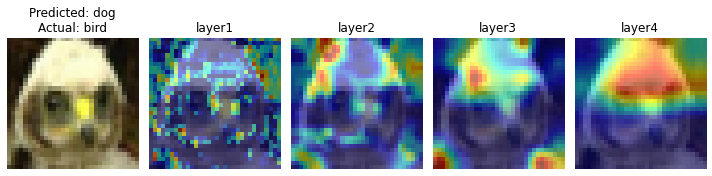

<Figure size 432x288 with 0 Axes>

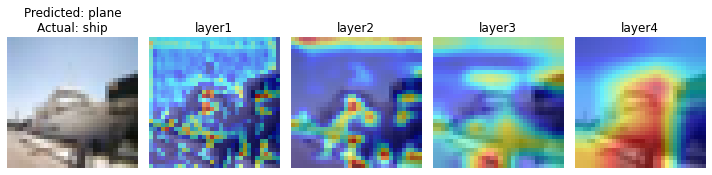

<Figure size 432x288 with 0 Axes>

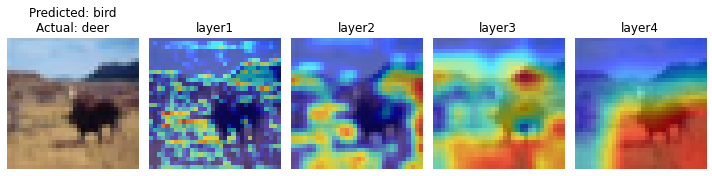

<Figure size 432x288 with 0 Axes>

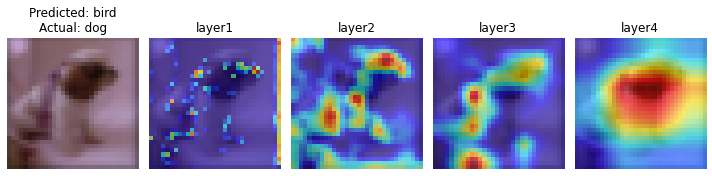

<Figure size 432x288 with 0 Axes>

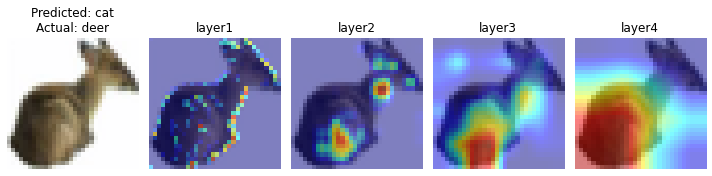

<Figure size 432x288 with 0 Axes>

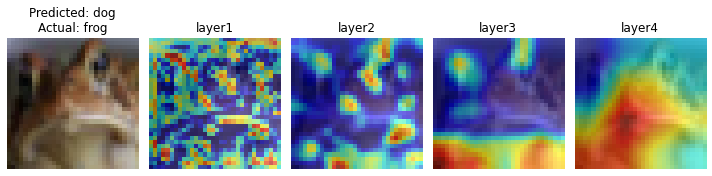

<Figure size 432x288 with 0 Axes>

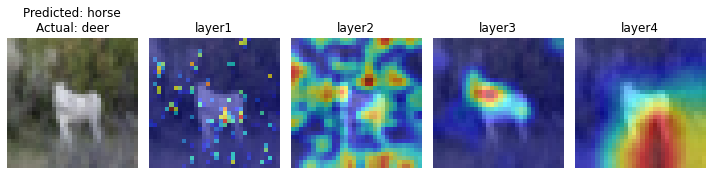

<Figure size 432x288 with 0 Axes>

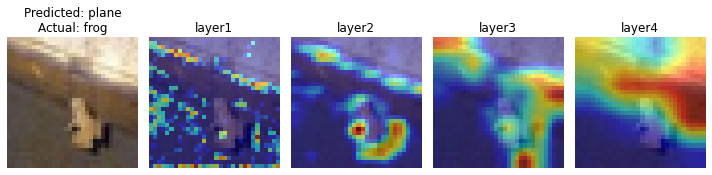

<Figure size 432x288 with 0 Axes>

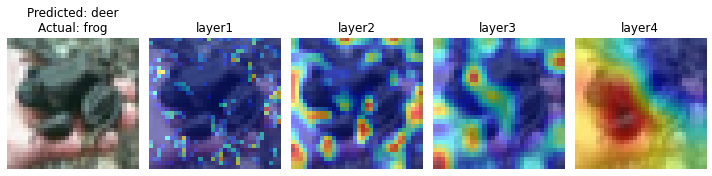

<Figure size 432x288 with 0 Axes>

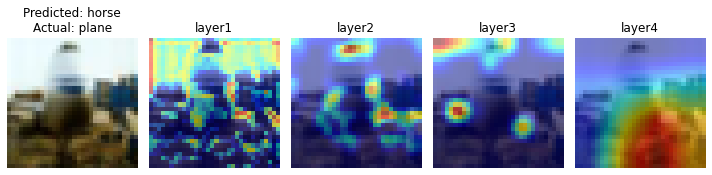

<Figure size 432x288 with 0 Axes>

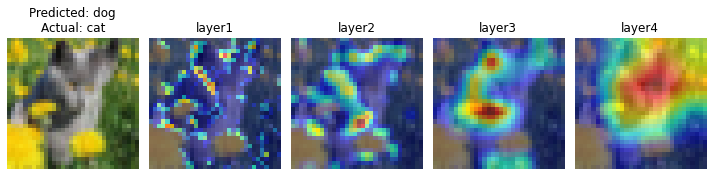

<Figure size 432x288 with 0 Axes>

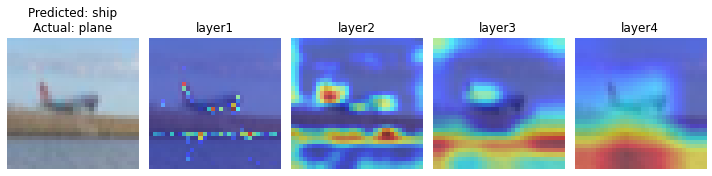

<Figure size 432x288 with 0 Axes>

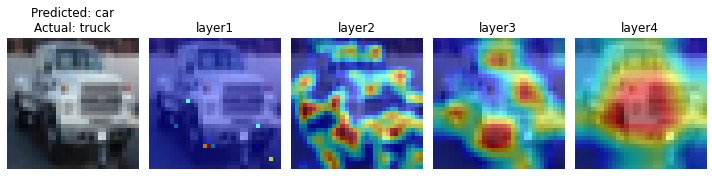

<Figure size 432x288 with 0 Axes>

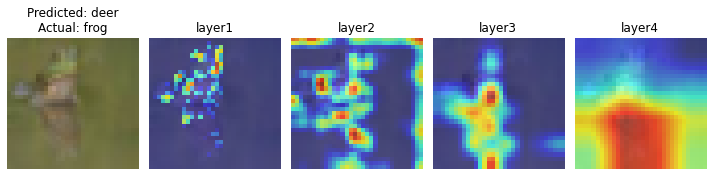

<Figure size 432x288 with 0 Axes>

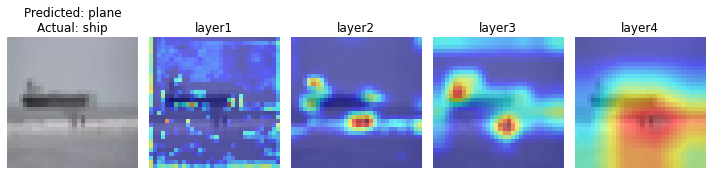

<Figure size 432x288 with 0 Axes>

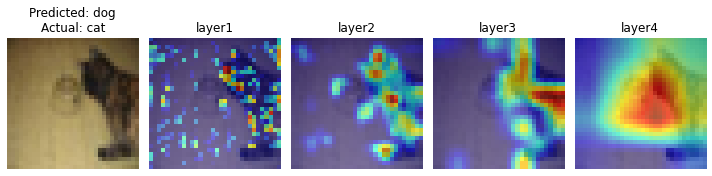

<Figure size 432x288 with 0 Axes>

In [52]:
gradcam_inst = GradDisplay(net, ['layer1', 'layer2', 'layer3', 'layer4'],device, mean, std, pred, targ)
gradcam_inst(images, 'grad_cam', True)